# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [27]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [28]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [29]:
# Read the Mapbox API key
load_dotenv('API.env')
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [30]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
new_data = pd.read_csv(file_path)

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)


In [31]:
new_data

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0,425769,1444,1122


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [32]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_ten_data = new_data.groupby('neighbourhood', as_index=False).mean()
top_ten_data = top_ten_data.sort_values('average_house_value', ascending=False)
top_ten_data = top_ten_data.head(10)
# Calculate the mean number of dwelling types units per year
# YOUR CODE HERE!
dwelling_type_sum = new_data.groupby('year', as_index=False)['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house'].mean()
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!
average_owned_rented_dwellings = to_data.groupby('year')['shelter_costs_owned', 'shelter_costs_rented'].mean()



C:\Users\Curtis lym\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Curtis lym\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [41]:
dwelling_types_per_year = to_data.groupby(['year']).sum()
dwelling_types_per_year = dwelling_types_per_year.drop(columns=['shelter_costs_owned', 'shelter_costs_rented', 'average_house_value'])
#getting dwelling types per year in order 

### Panel Visualization Functions

In [68]:
# Define Panel visualization functions
def neighbourhood_map():
    """Neighbourhood Map"""
    
    # YOUR CODE HERE!
    file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
    df_neighbourhood_locations = pd.read_csv(file_path)
    df_neighbourhood_locations = df_neighbourhood_locations.drop(['neighbourhood'], axis=1)
    df_neighbourhood_locations.head()
    
    mean_of_each_neighbourhood = to_data.groupby('neighbourhood', as_index=False).mean()
    mean_of_each_neighbourhood.head()
    
    neighbourhood_value_joined_locations = pd.concat([df_neighbourhood_locations, mean_of_each_neighbourhood], 
                                                 axis='columns', 
                                                 join='inner')
    map_plot = px.scatter_mapbox(
    neighbourhood_value_joined_locations,
    lat='lat',
    lon='lon',
    color='average_house_value',
    size='average_house_value',
    hover_name='neighbourhood',
    hover_data = neighbourhood_value_joined_locations.columns[3:14]
    )
    
    return map_plot
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    # YOUR CODE HERE!
    
    fig = plt.figure()
    bar_chart = data.plot.bar(color=color)
    bar_chart.set_xlabel(xlabel, fontsize=12)
    bar_chart.set_ylabel(ylabel, fontsize=12)
    bar_chart.set_title(title, fontsize=14, fontweight="bold")  
    plt.close(fig)
    
    return fig
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    # YOUR CODE HERE!
    fig = plt.figure()
    line_chart = data.plot.line(color=color)
    line_chart.set_xlabel(xlabel, fontsize=12)
    line_chart.set_ylabel(ylabel, fontsize=12)
    line_chart.set_title(title, fontsize=14, fontweight="bold")    
    plt.close(fig)
    
    return fig
def average_house_value():
    """Average house values per year."""
    
    # YOUR CODE HERE!
    average_house_value = to_data.groupby('year')['average_house_value'].mean()
    
    average_house_value_linechart = average_house_value.hvplot.line(title='Average House Value', yformatter='$%.1f')
    average_house_value_linechart
    
    return average_house_value_linechart
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    
    # YOUR CODE HERE!

    neighbourhood_average_value = new_data[['year', 'neighbourhood', 'average_house_value']]
    
    line_chart = neighbourhood_average_value.hvplot.line(
    title='Average House Value per Neighbourhood', 
    x='year', 
    y='average_house_value', 
    xlabel='Year', 
    ylabel='Average House Value',
    groupby='neighbourhood',
    yformatter='$%.1f'
    )
    return line_chart
def number_dwelling_types():
    """Number of dwelling types per year"""
    # YOUR CODE HERE!
    dwelling_types_per_year = new_data[['year', 'neighbourhood', 'single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]
    dwelling_types_per_year
    bar_chart = dwelling_types_per_year.hvplot.bar(title='Dwelling Types per Year', 
                                    x='year',
                                    groupby='neighbourhood', 
                                    rot=90,
                                    height= 600
                                   )
    
    return bar_chart
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # YOUR CODE HERE!
    
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    # YOUR CODE HERE!
    top_ten_data = to_data.groupby('neighbourhood', as_index=False).mean()
    top_ten_data = top_ten_data.sort_values('average_house_value', ascending=False)
    top_ten_data = top_ten_data.head(10)
    
    top_ten_data = top_ten_data.hvplot.bar(title='Top 10 Most Expensive Dwelling Types per Year',
                        x='neighbourhood',
                        y='average_house_value',
                        rot=90,
                        width=800,
                        yformatter='$%.1f'
                       )
    
    return top_ten_data
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # YOUR CODE HERE!
    fig = px.sunburst(top_ten_data,  
                      path = ['year', 'neighbourhood', 'average_house_value'], 
                      values = 'average_house_value',
                      color = 'average_house_value'
                      
                     )
    fig.show()
    
    

In [ ]:
#the funtions help to store the data analysis created and allow us to call it back in the dashboard panel.

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [72]:
row_1 = pn.Row(create_bar_chart(dwelling_types_per_year.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red"),
               create_bar_chart(dwelling_types_per_year.loc[2006], "Dwelling Types in Toronto in 2001", "2006", "Dwelling Type Units", "blue"))
row_2 = pn.Row(create_bar_chart(dwelling_types_per_year.loc[2011], "Dwelling Types in Toronto in 2001", "2011", "Dwelling Type Units", "yellow"),
               create_bar_chart(dwelling_types_per_year.loc[2016], "Dwelling Types in Toronto in 2001", "2016", "Dwelling Type Units", "pink"))

In [73]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
welcome_column = pn.Column("## Welcome to the Toronto Dwellings Analysis", neighbourhood_map())
yearly_market_analysis = pn.Column("## Dwelling Types in Toronto", row_1, row_2)
shelter_costs_vs_house_value = pn.Column("## Neighbourhood Analysis By Line Chart", create_line_chart(average_owned_rented_dwellings.iloc[:,0], 
                                                                                    "Average Monthly Shelter Cost for Owned Dwellings in Toronto", 
                                                                                    "Year", 
                                                                                    "Avg Monthly Shelter Costs", 
                                                                                    "blue"),
                                                                                    create_line_chart(average_owned_rented_dwellings.iloc[:,1], 
                                                                                    "Average Monthly Shelter Cost for Rented Dwellings in Toronto", 
                                                                                    "Year", 
                                                                                    "Avg Monthly Shelter Costs", "yellow"), average_house_value())
neighbourhood_analasys = pn.Column("## Sunburst Plot Analysis", average_value_by_neighbourhood(), number_dwelling_types())
top_expensive_neighbourhoods = pn.Column("## Sunburst Plot Analysis", top_most_expensive_neighbourhoods())

dashboard = pn.Tabs(
    ("Welcome", welcome_column
    ),
    ("Yearly Market Analysis", yearly_market_analysis
    ),
    (
        "Shelter Costs vs House Value",
        shelter_costs_vs_house_value
    ),
    (
        "Neighbourhood Analasys",
        neighbourhood_analasys
    ),
    (
        "Top Expensive Neighbourhoods",
        top_expensive_neighbourhoods
    ))



## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Plotly(Figure, hover_data={'points': [{'curveNumber'...}, relayout_data={'mapbox.center': {'lon': ...})
    [1] Column
        [0] Markdown(str)
        [1] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
        [2] Row
            [0] Matplotlib(Figure)
            [1] Matplotlib(Figure)
    [2] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] Matplotlib(Figure)
        [3] HoloViews(Curve)
    [3] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
        [2] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
                [1] VSpacer()
    [4] Column
        [0] Markdown(str)
        [1] HoloViews(Bars)
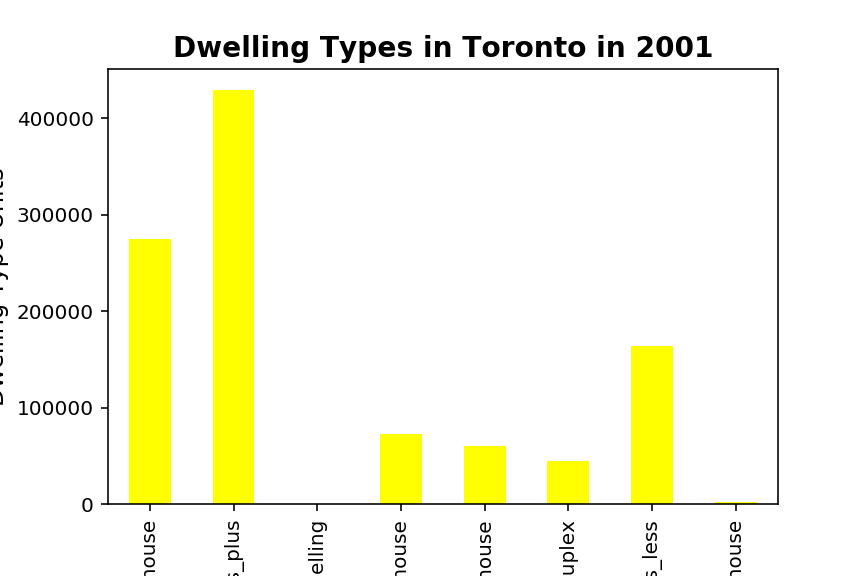
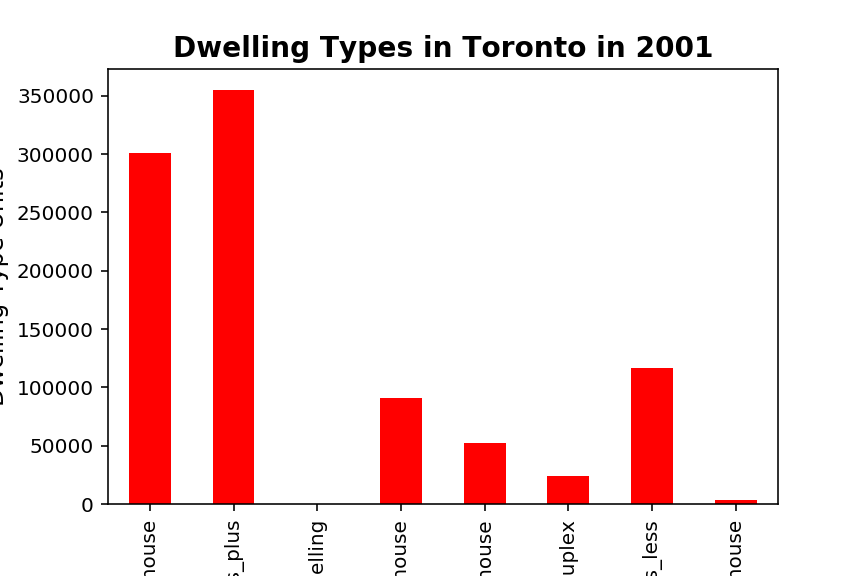
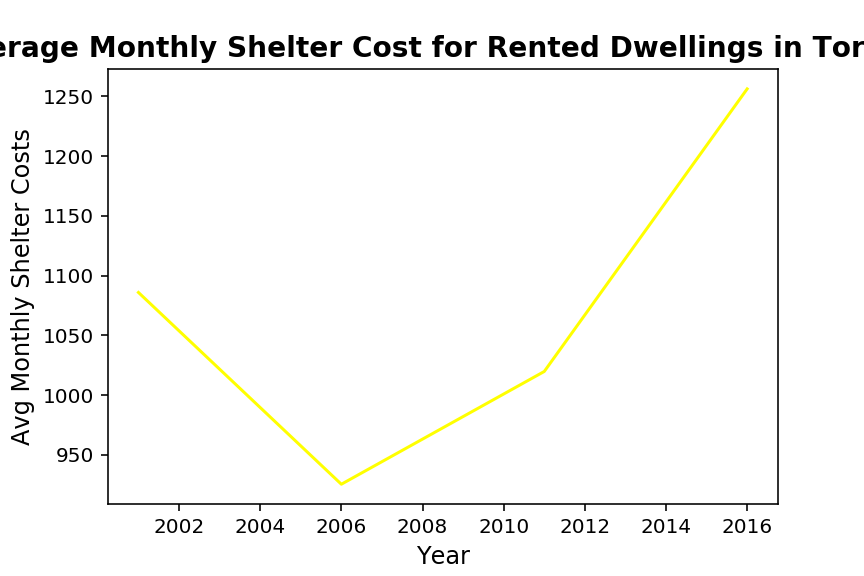
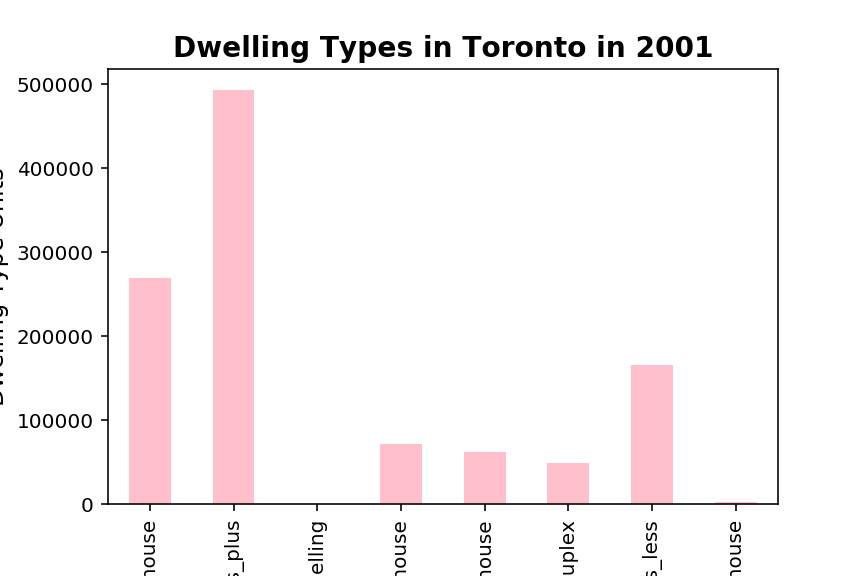
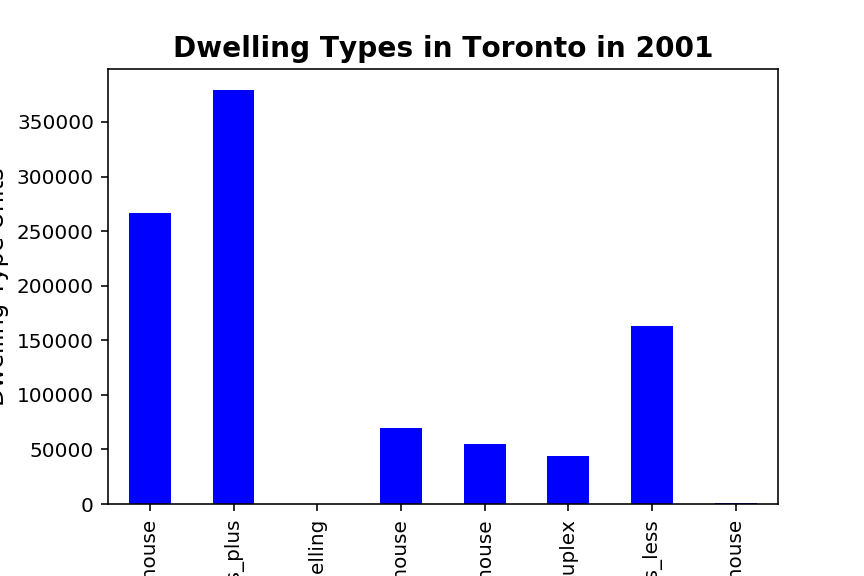
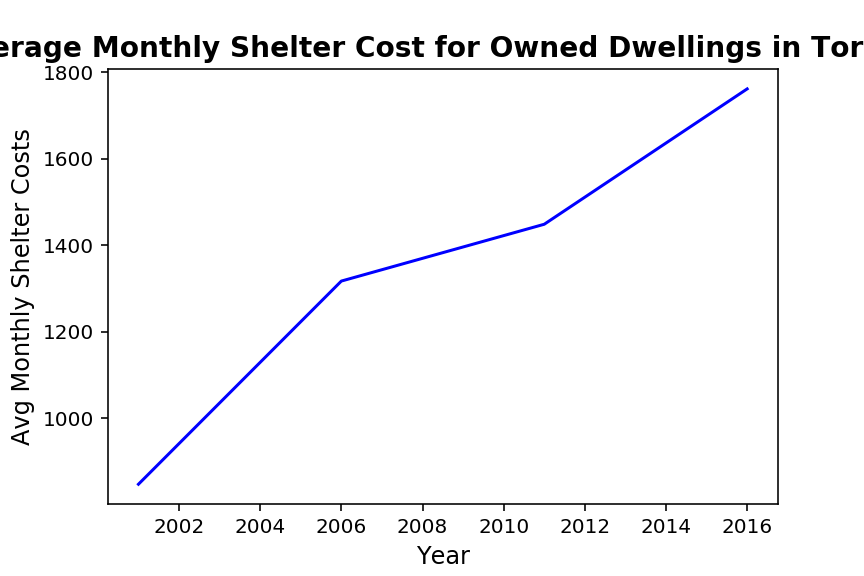

In [77]:
dashboard.servable()
#dashboard.servable allaows the creating of a interactive dashboard with tabs that lead to difffernet data sets.